In [54]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [55]:
df = pd.read_excel('./data/winnings.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date_GMT                               1393 non-null   object 
 1   Country                                1393 non-null   object 
 2   League                                 1393 non-null   object 
 3   Home Team                              1393 non-null   object 
 4   Away Team                              1393 non-null   object 
 5   Home Team Points Per Game (Pre-Match)  1393 non-null   float64
 6   Away Team Points Per Game (Pre-Match)  1393 non-null   float64
 7   Home Team Points Per Game (Current)    1393 non-null   float64
 8   Away Team Points Per Game (Current)    1393 non-null   float64
 9   Average Goals                          1393 non-null   float64
 10  BTTS Average                           1393 non-null   int64  
 11  Over

In [56]:
df.head(10)

,date_GMT,Country,League,Home Team,Away Team,Home Team Points Per Game (Pre-Match),Away Team Points Per Game (Pre-Match),Home Team Points Per Game (Current),Away Team Points Per Game (Current),Average Goals,...,Over05 Average,Over15 Average,Match Status,Home Team Pre-Match xG,Away Team Pre-Match xG,Game Week,Match FootyStats URL,Result - Home Team Goals,Result - Away Team Goals,Total Goals
0,Aug 31 2024 - 11:00pm,USA,USL Championship,Detroit City FC,Hartford Athletic,1.33,0.36,1.31,0.42,2.37,...,96,61,complete,1.07,1.23,28,/usa/hartford-athletic-vs-detroit-city-fc-h2h-...,1,1,2
1,Aug 31 2024 - 11:00pm,USA,USL Championship,Indy Eleven,Pittsburgh Riverhounds,1.42,1.08,1.38,1.07,2.26,...,85,65,complete,1.47,1.22,28,/usa/indy-eleven-vs-pittsburgh-riverhounds-fc-...,1,1,2
2,Aug 31 2024 - 11:00pm,USA,USL Championship,Miami FC,Monterey Bay,0.50,0.83,0.67,0.77,3.08,...,100,81,complete,1.27,1.17,34,/usa/miami-fc-vs-monterey-bay-fc-h2h-stats#729...,1,0,1
3,Aug 31 2024 - 11:00pm,Canada,Canadian Premier League,Atlético Ottawa,Vancouver FC,1.50,1.22,1.64,1.10,3.44,...,100,95,complete,1.50,1.08,21,/canada/atletico-ottawa-vs-vancouver-fc-h2h-st...,1,0,1
4,Aug 31 2024 - 11:00pm,Paraguay,Division Profesional,Guaraní,Cerro Porteño,1.33,2.14,1.39,2.07,2.39,...,89,70,complete,1.35,1.67,9,/paraguay/club-guarani-vs-club-cerro-porteno-h...,1,0,1
5,Aug 31 2024 - 11:00pm,El Salvador,Salvadoran Primera División,Municipal Limeño,FAS,1.80,1.00,1.57,1.25,2.22,...,82,72,complete,1.46,1.50,8,/el-salvador/cd-municipal-limeno-vs-cd-fas-h2h...,1,1,2
6,Aug 31 2024 - 11:30pm,USA,USL Championship,Rhode Island,Birmingham Legion,1.33,1.75,1.46,1.62,2.25,...,84,67,complete,1.62,1.41,28,/usa/birmingham-legion-fc-vs-rhode-island-fc-h...,2,0,2
7,Aug 31 2024 - 11:30pm,USA,USL Championship,North Carolina FC,Louisville City,1.75,1.67,1.71,1.77,2.42,...,84,63,complete,1.36,1.58,28,/usa/north-carolina-fc-vs-louisville-city-fc-h...,4,6,10
8,Sep 01 2024 - 12:00am,Argentina,Prim B Nacional,Gimnasia Jujuy,Club Atlético Güemes,2.07,0.50,2.19,0.47,1.47,...,86,47,complete,1.42,1.13,30,/argentina/gimnasia-y-esgrima-de-jujuy-vs-club...,1,0,1
9,Sep 01 2024 - 12:00am,Chile,Primera División,Everton,Unión Española,1.27,0.90,1.42,0.82,2.39,...,86,67,complete,1.61,1.41,23,/chile/everton-de-vina-del-mar-vs-union-espano...,3,2,5


In [57]:
df.rename(columns={'date_GMT': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   1393 non-null   datetime64[ns]
 1   Country                                1393 non-null   object        
 2   League                                 1393 non-null   object        
 3   Home Team                              1393 non-null   object        
 4   Away Team                              1393 non-null   object        
 5   Home Team Points Per Game (Pre-Match)  1393 non-null   float64       
 6   Away Team Points Per Game (Pre-Match)  1393 non-null   float64       
 7   Home Team Points Per Game (Current)    1393 non-null   float64       
 8   Away Team Points Per Game (Current)    1393 non-null   float64       
 9   Average Goals                          1393 non-null   float64 

In [58]:
df.head()

,date,Country,League,Home Team,Away Team,Home Team Points Per Game (Pre-Match),Away Team Points Per Game (Pre-Match),Home Team Points Per Game (Current),Away Team Points Per Game (Current),Average Goals,...,Over05 Average,Over15 Average,Match Status,Home Team Pre-Match xG,Away Team Pre-Match xG,Game Week,Match FootyStats URL,Result - Home Team Goals,Result - Away Team Goals,Total Goals
0,2024-08-31 23:00:00,USA,USL Championship,Detroit City FC,Hartford Athletic,1.33,0.36,1.31,0.42,2.37,...,96,61,complete,1.07,1.23,28,/usa/hartford-athletic-vs-detroit-city-fc-h2h-...,1,1,2
1,2024-08-31 23:00:00,USA,USL Championship,Indy Eleven,Pittsburgh Riverhounds,1.42,1.08,1.38,1.07,2.26,...,85,65,complete,1.47,1.22,28,/usa/indy-eleven-vs-pittsburgh-riverhounds-fc-...,1,1,2
2,2024-08-31 23:00:00,USA,USL Championship,Miami FC,Monterey Bay,0.50,0.83,0.67,0.77,3.08,...,100,81,complete,1.27,1.17,34,/usa/miami-fc-vs-monterey-bay-fc-h2h-stats#729...,1,0,1
3,2024-08-31 23:00:00,Canada,Canadian Premier League,Atlético Ottawa,Vancouver FC,1.50,1.22,1.64,1.10,3.44,...,100,95,complete,1.50,1.08,21,/canada/atletico-ottawa-vs-vancouver-fc-h2h-st...,1,0,1
4,2024-08-31 23:00:00,Paraguay,Division Profesional,Guaraní,Cerro Porteño,1.33,2.14,1.39,2.07,2.39,...,89,70,complete,1.35,1.67,9,/paraguay/club-guarani-vs-club-cerro-porteno-h...,1,0,1


In [59]:
df = df.drop(columns='Match FootyStats URL')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   1393 non-null   datetime64[ns]
 1   Country                                1393 non-null   object        
 2   League                                 1393 non-null   object        
 3   Home Team                              1393 non-null   object        
 4   Away Team                              1393 non-null   object        
 5   Home Team Points Per Game (Pre-Match)  1393 non-null   float64       
 6   Away Team Points Per Game (Pre-Match)  1393 non-null   float64       
 7   Home Team Points Per Game (Current)    1393 non-null   float64       
 8   Away Team Points Per Game (Current)    1393 non-null   float64       
 9   Average Goals                          1393 non-null   float64 

In [60]:
""" 
Encode the teams
"""

home_teams = []
for _ in df['Home Team'].unique():
    home_teams.append(_)
    home_teams.sort()
len(home_teams)

1312

In [61]:
away_teams = []
for _ in df['Away Team'].unique():
    away_teams.append(_)
    away_teams.sort()

len(away_teams)

1316

In [62]:
combined_teams = []

for _ in away_teams:
    if _ not in home_teams:
        home_teams.append(_)
        home_teams.sort()

len(home_teams)

1972

In [63]:
countries = []

for _ in df['Country'].unique():
    _ = _.upper()
    countries.append(_)
    countries.sort()

len(countries)

47

# Exploratory Data Analysis
## Univariate Analysis
Lets look at the distributions of different columns within this dataset.

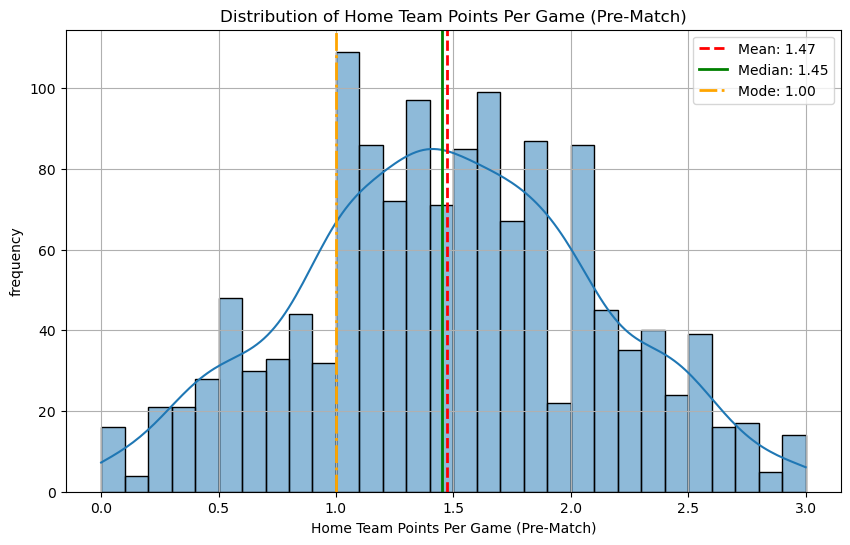

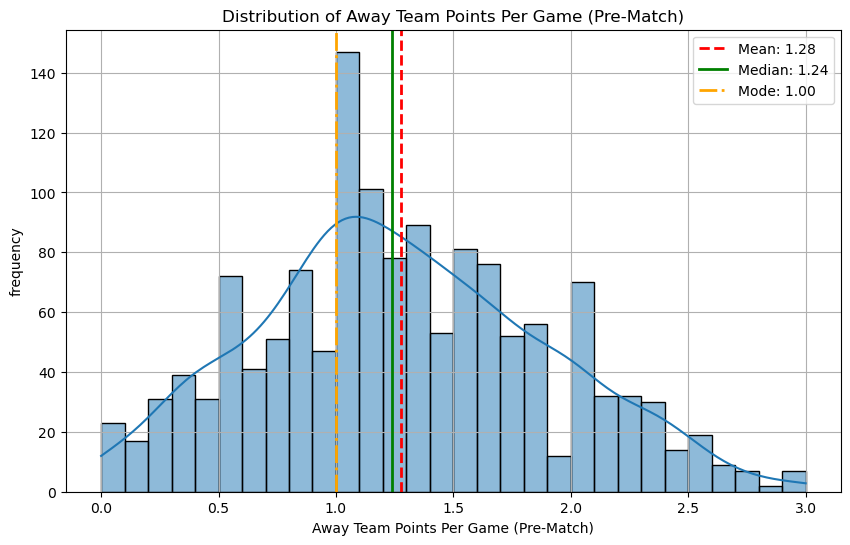

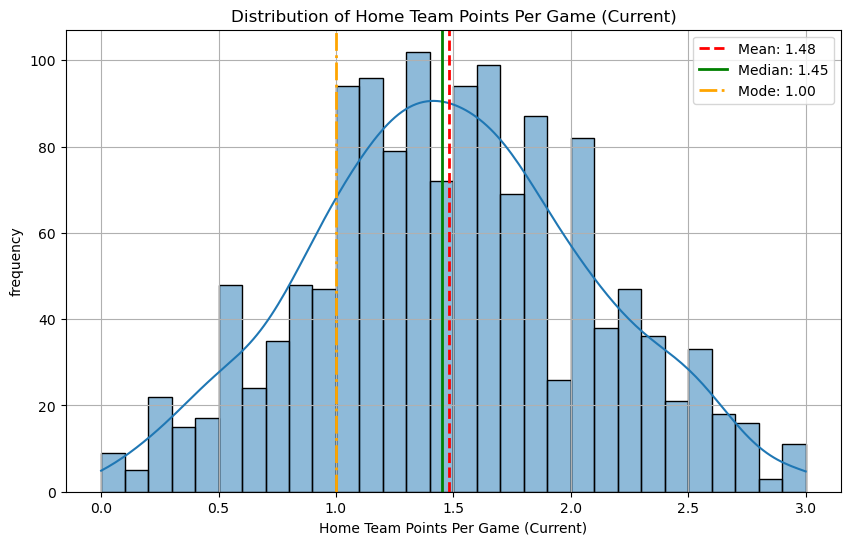

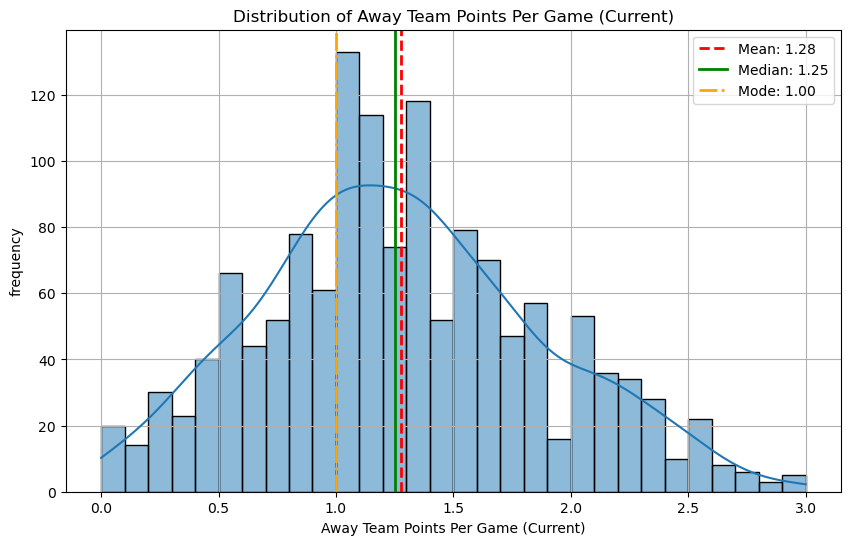

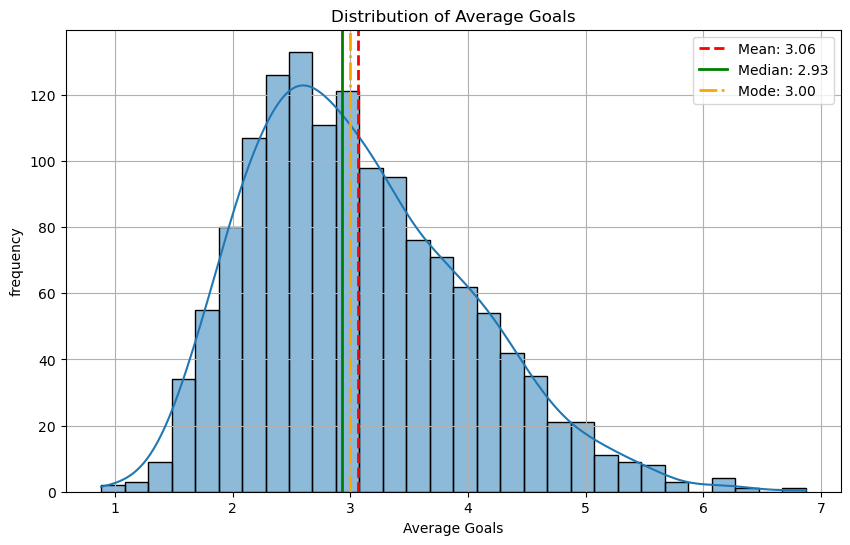

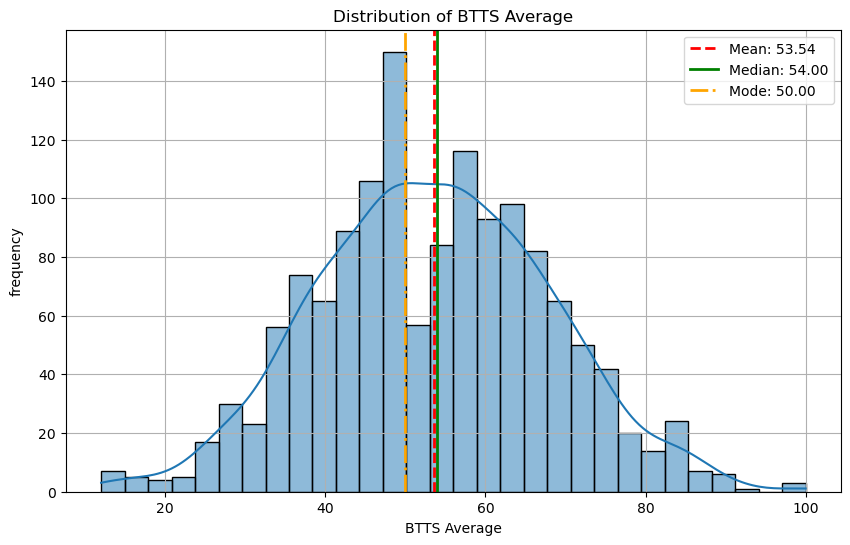

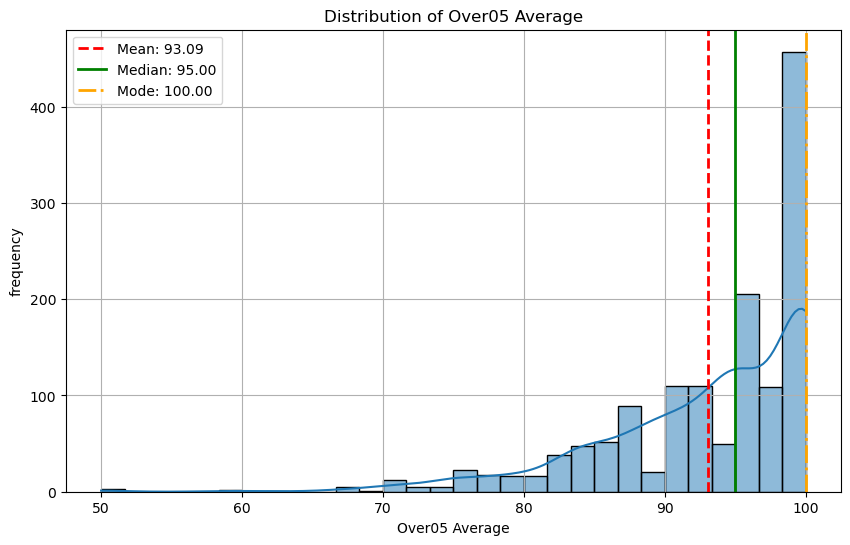

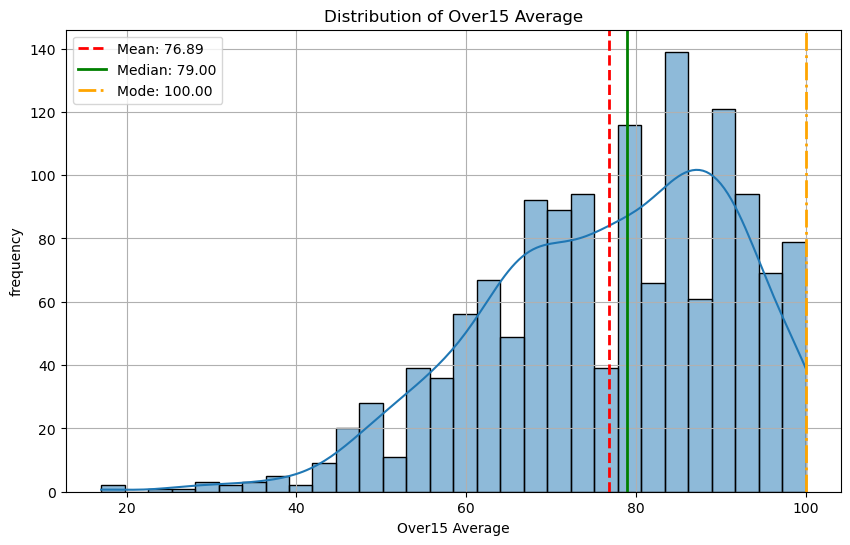

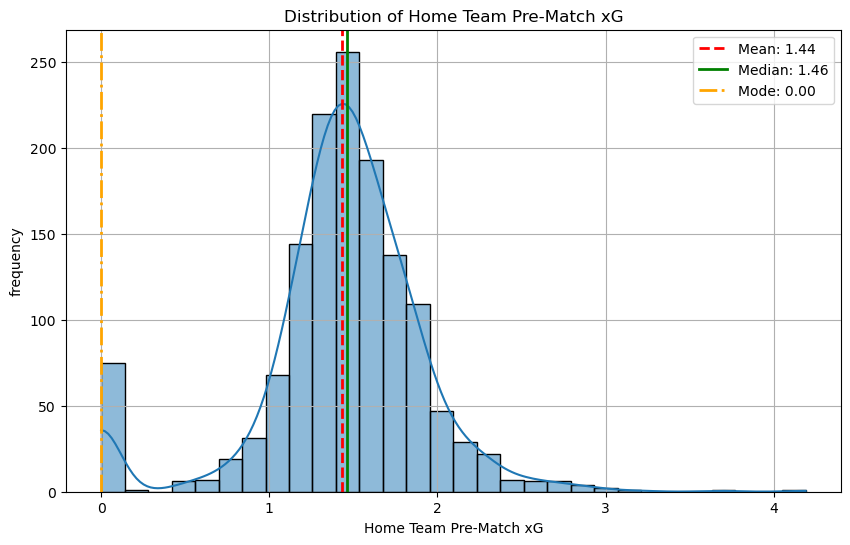

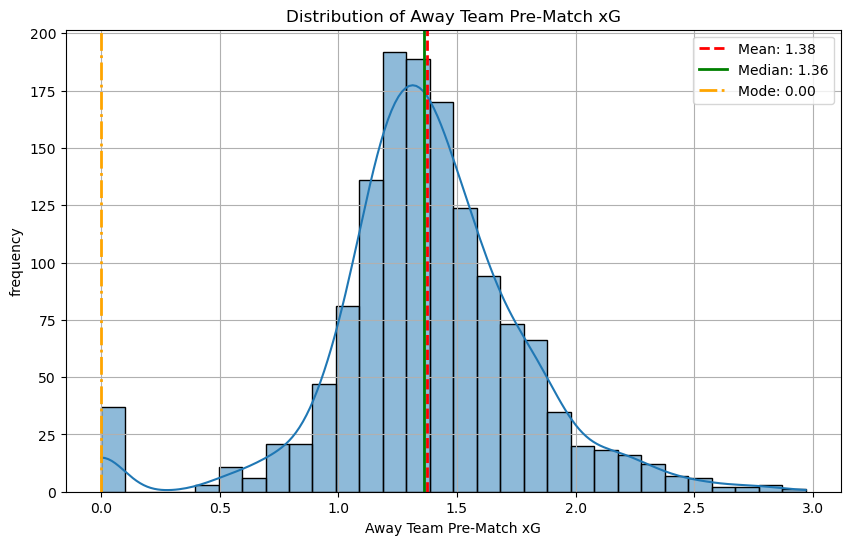

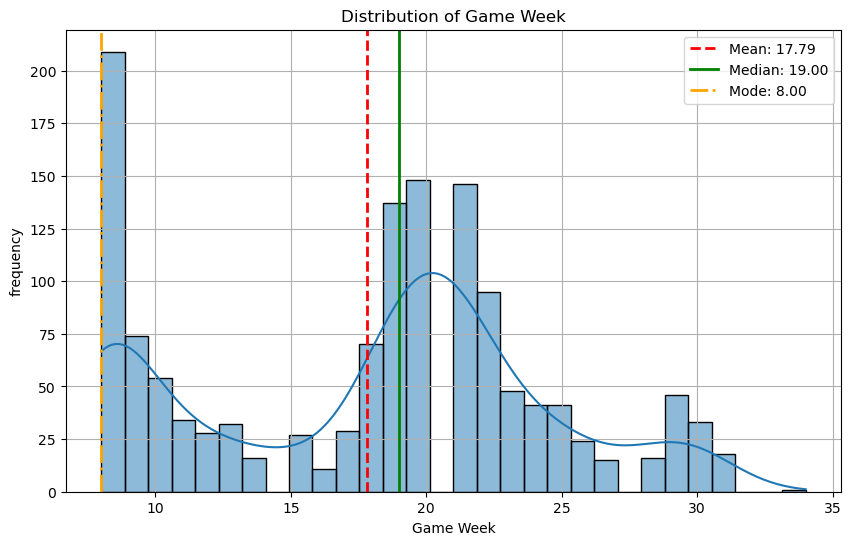

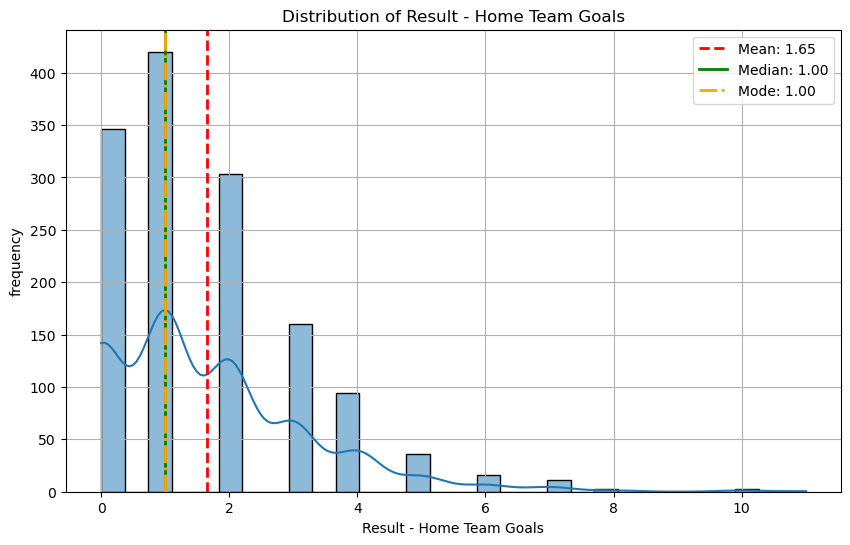

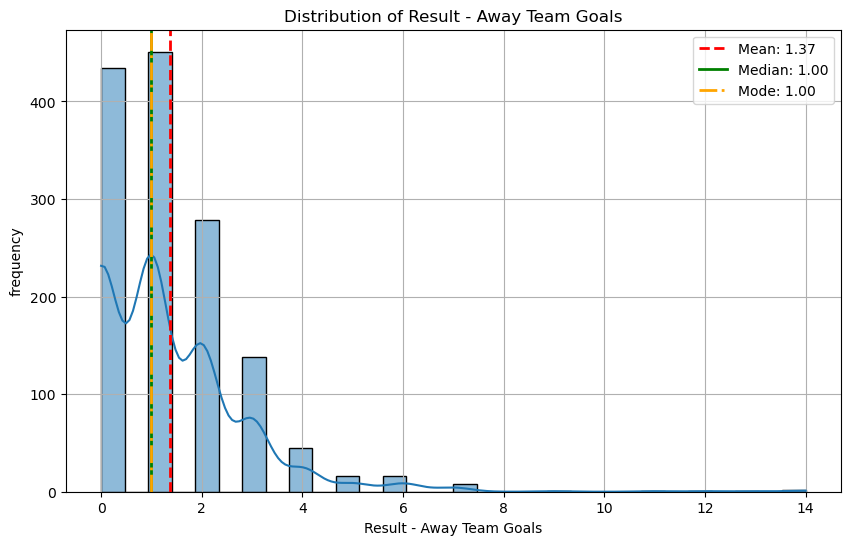

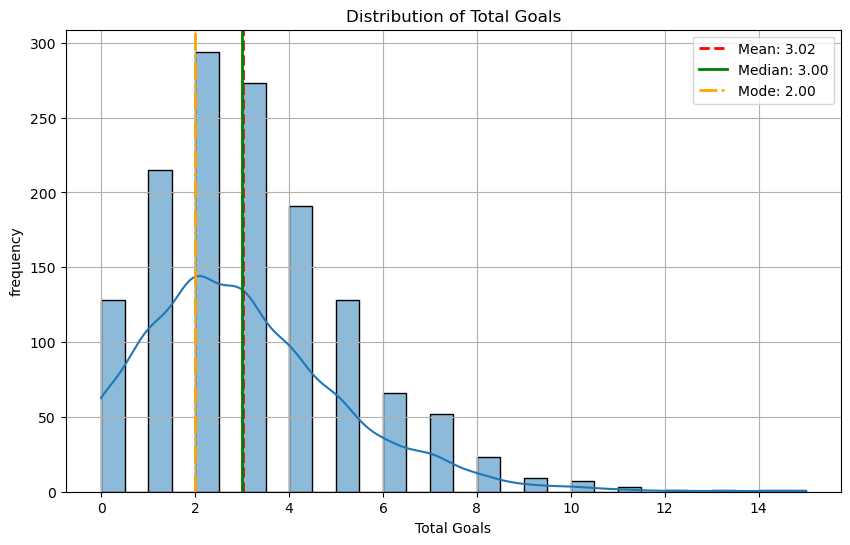

In [64]:
num_columns = df.select_dtypes(include=['float64', 'int64'] ).columns

for col in num_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)

    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().iloc[0]

    plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-', linewidth=2, label=f'Median: {median:.2f}')
    plt.axvline(mode, color='orange', linestyle='-.', linewidth=2, label=f'Mode: {mode:.2f}')

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.legend()
    plt.grid(True)
    plt.show()


Now for the boxplots.

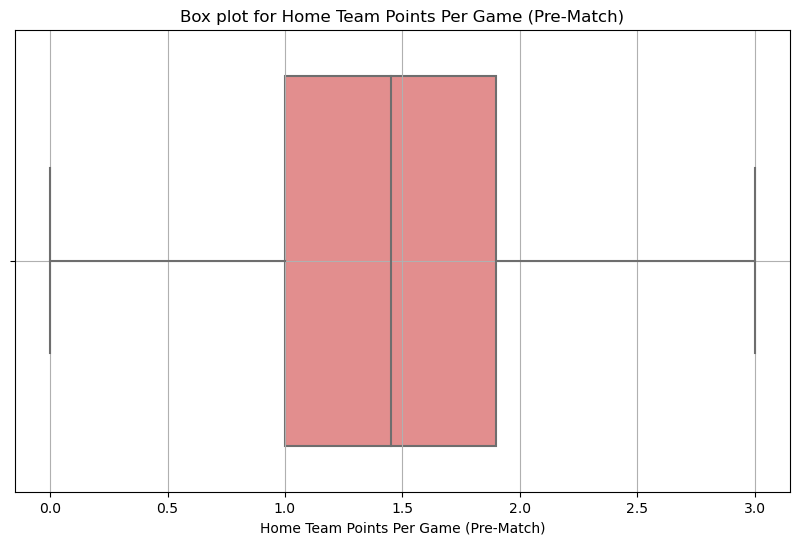

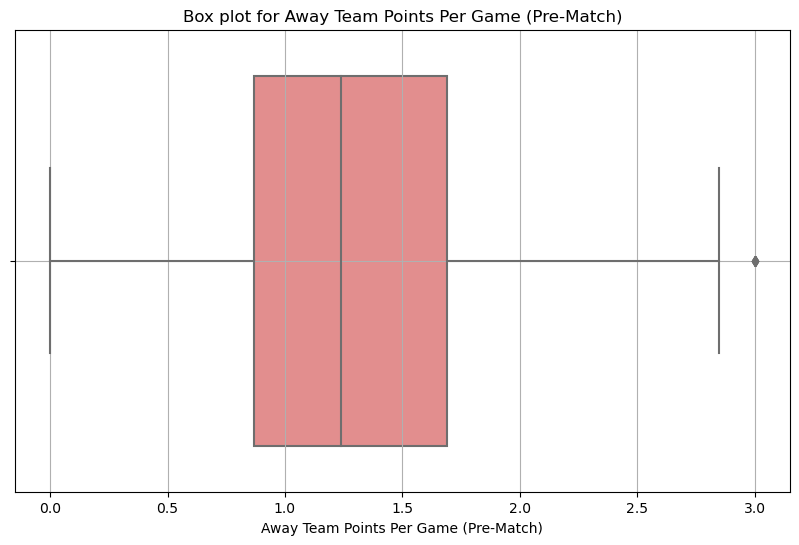

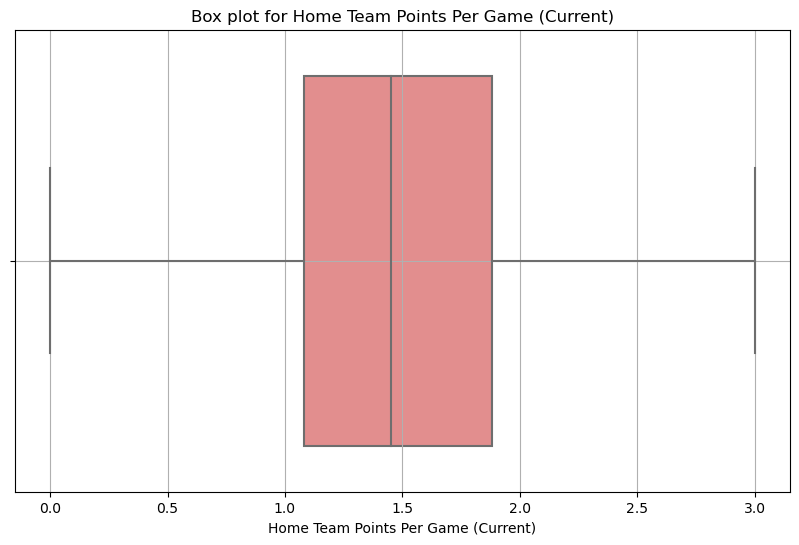

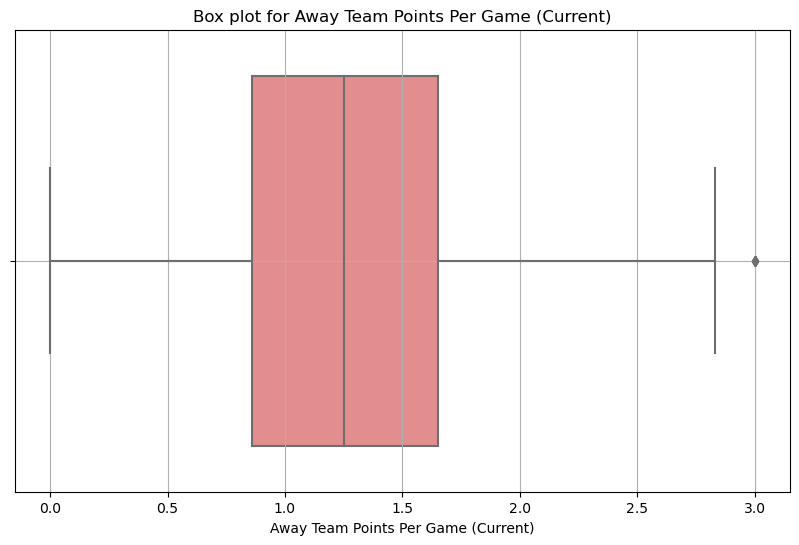

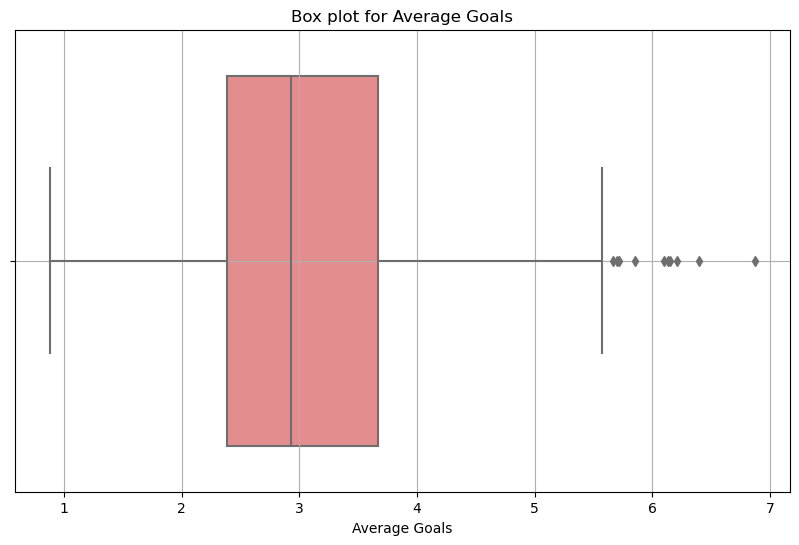

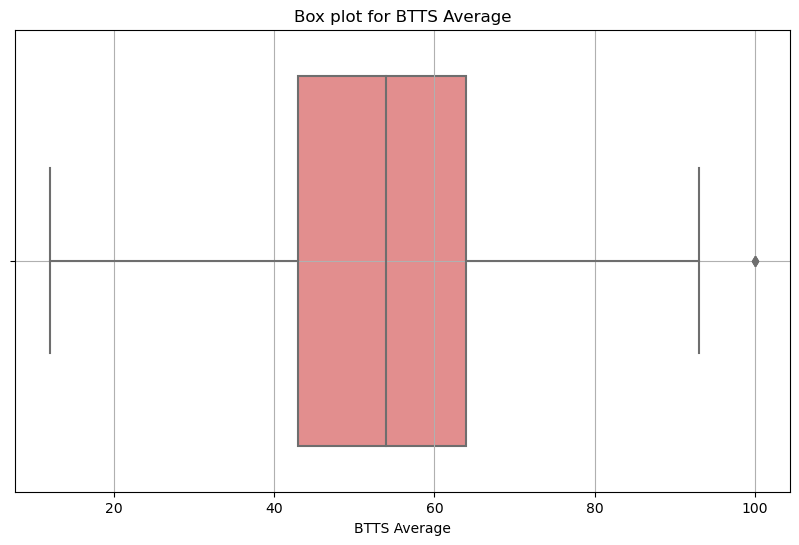

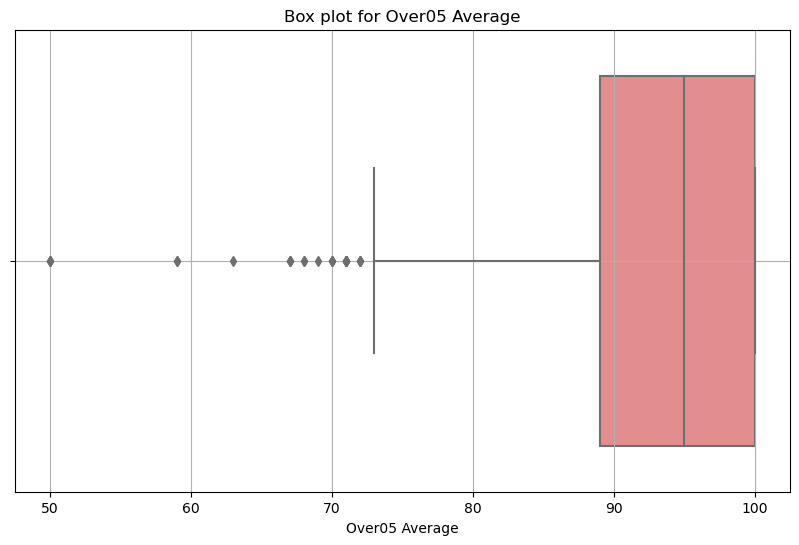

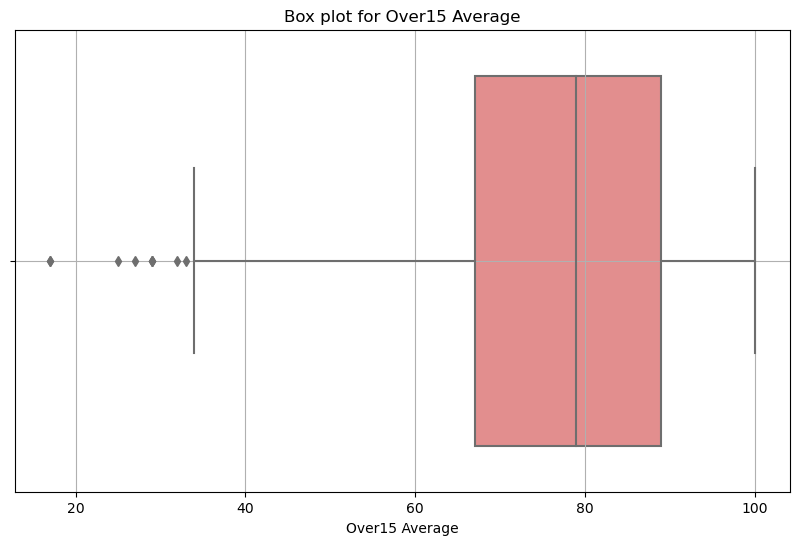

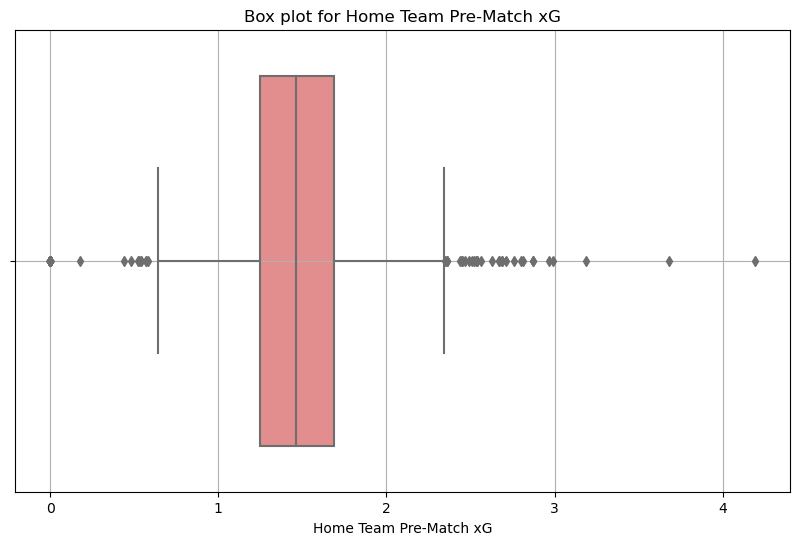

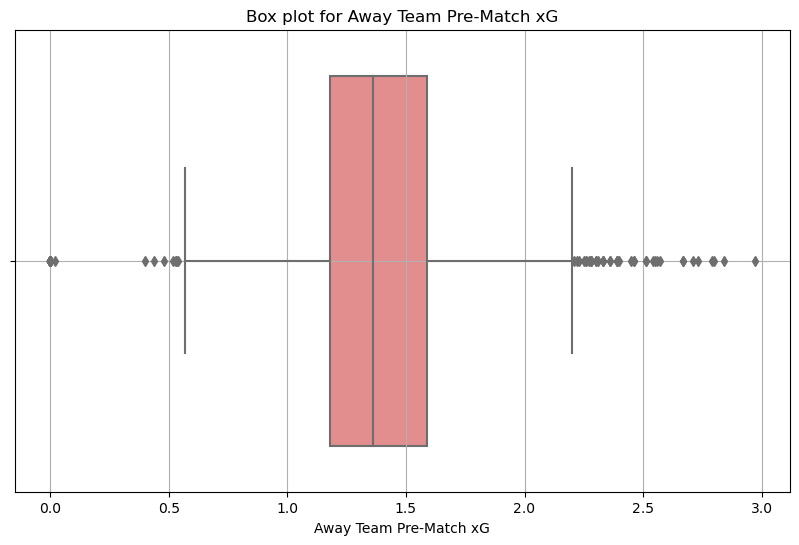

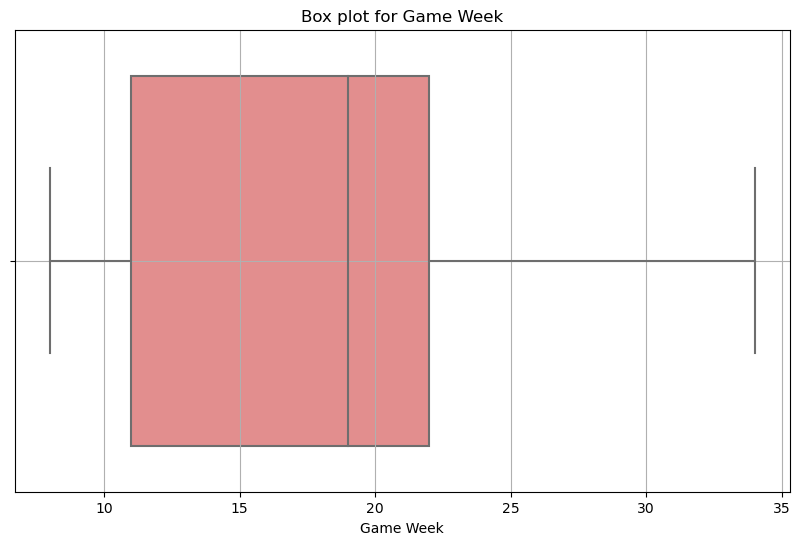

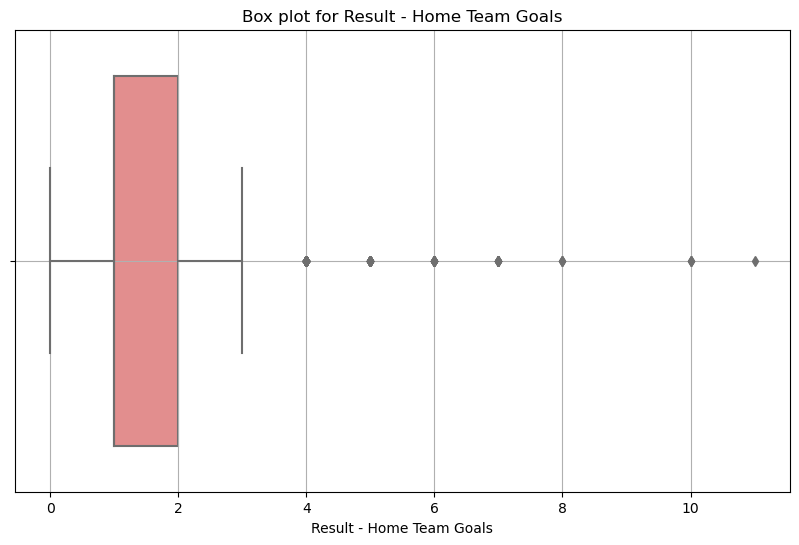

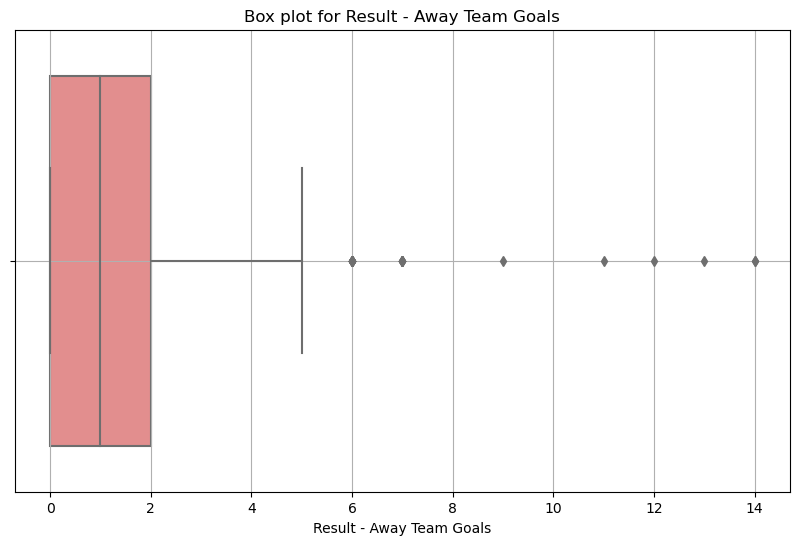

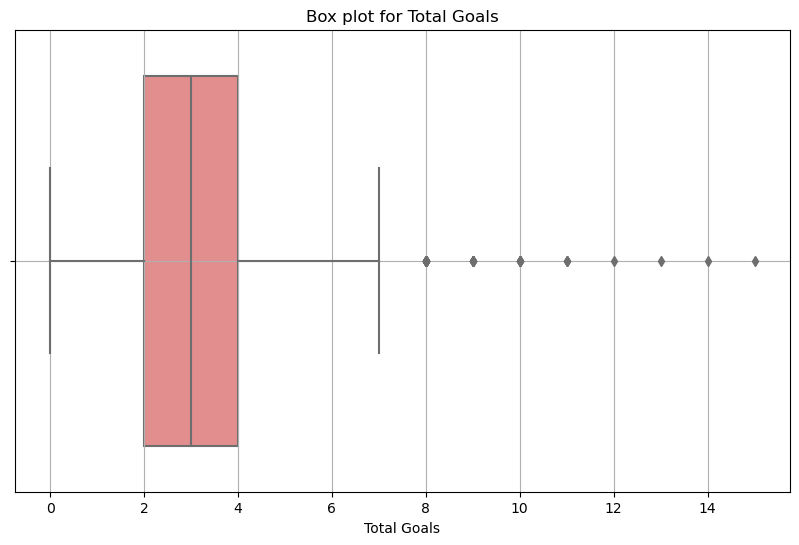

In [65]:
for col in num_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.xlabel(col)
    plt.grid(True)
    plt.title(f'Box plot for {col}')
    plt.show()

## Bivariate Analysis
Lets look at how different columns relate to each other.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   1393 non-null   datetime64[ns]
 1   Country                                1393 non-null   object        
 2   League                                 1393 non-null   object        
 3   Home Team                              1393 non-null   object        
 4   Away Team                              1393 non-null   object        
 5   Home Team Points Per Game (Pre-Match)  1393 non-null   float64       
 6   Away Team Points Per Game (Pre-Match)  1393 non-null   float64       
 7   Home Team Points Per Game (Current)    1393 non-null   float64       
 8   Away Team Points Per Game (Current)    1393 non-null   float64       
 9   Average Goals                          1393 non-null   float64 

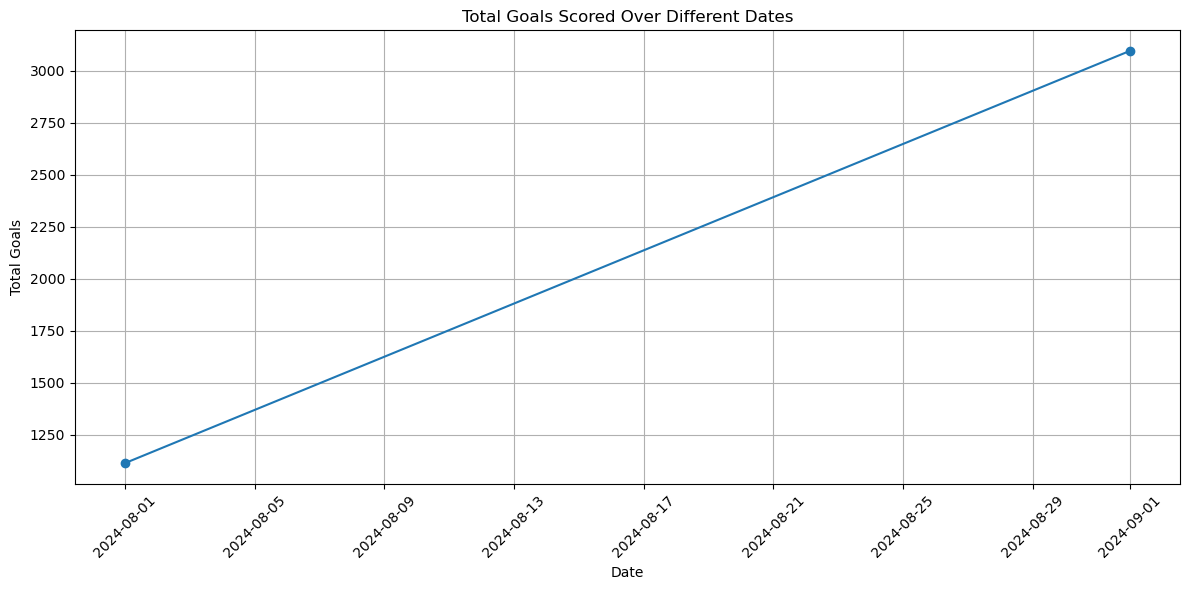

In [76]:
""" 
Visualize trends over time, such as goals scored per match, team performance metrics, or average goals per game week.

Plot the date column on the x-axis and metrics like Total Goals or Home Team Points Per Game (Current) on the y-axis.

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Total Goals'], marker='o', linestyle='-')
plt.title('Total Goals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Goals')
plt.grid(True)
plt.show()

"""

#we can start with trends over time, first extract the months
df['month_year'] = df['date'].dt.to_period('M')

#group the goals according to months
m_goals = df.groupby('month_year')['Total Goals'].sum().reset_index()

m_goals['month_year'] = m_goals['month_year'].dt.to_timestamp()


plt.figure(figsize=(12, 6))
plt.plot(m_goals['month_year'], m_goals['Total Goals'], marker='o', linestyle='-')
plt.title('Total Goals Scored Over Different Dates')
plt.xlabel('Date')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   1393 non-null   datetime64[ns]
 1   Country                                1393 non-null   object        
 2   League                                 1393 non-null   object        
 3   Home Team                              1393 non-null   object        
 4   Away Team                              1393 non-null   object        
 5   Home Team Points Per Game (Pre-Match)  1393 non-null   float64       
 6   Away Team Points Per Game (Pre-Match)  1393 non-null   float64       
 7   Home Team Points Per Game (Current)    1393 non-null   float64       
 8   Away Team Points Per Game (Current)    1393 non-null   float64       
 9   Average Goals                          1393 non-null   float64 

In [75]:
df['month_year'].unique()

<PeriodArray>
['2024-08', '2024-09']
Length: 2, dtype: period[M]

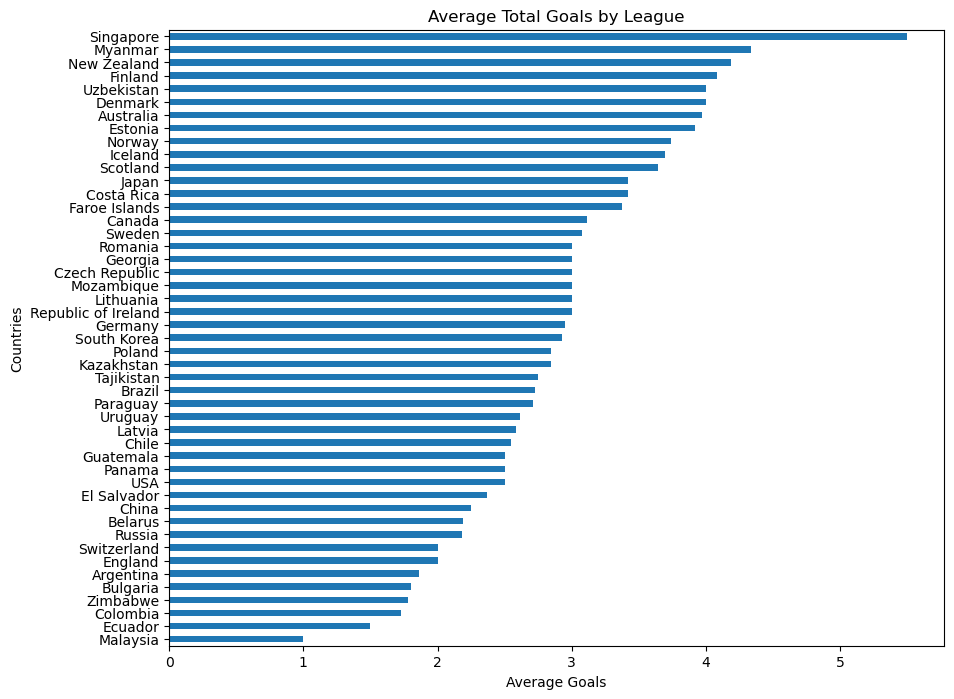

In [79]:
#average goals by country
df.groupby('Country')['Total Goals'].mean().sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Average Total Goals by League')
plt.xlabel('Average Goals')
plt.ylabel('Countries')
plt.show()


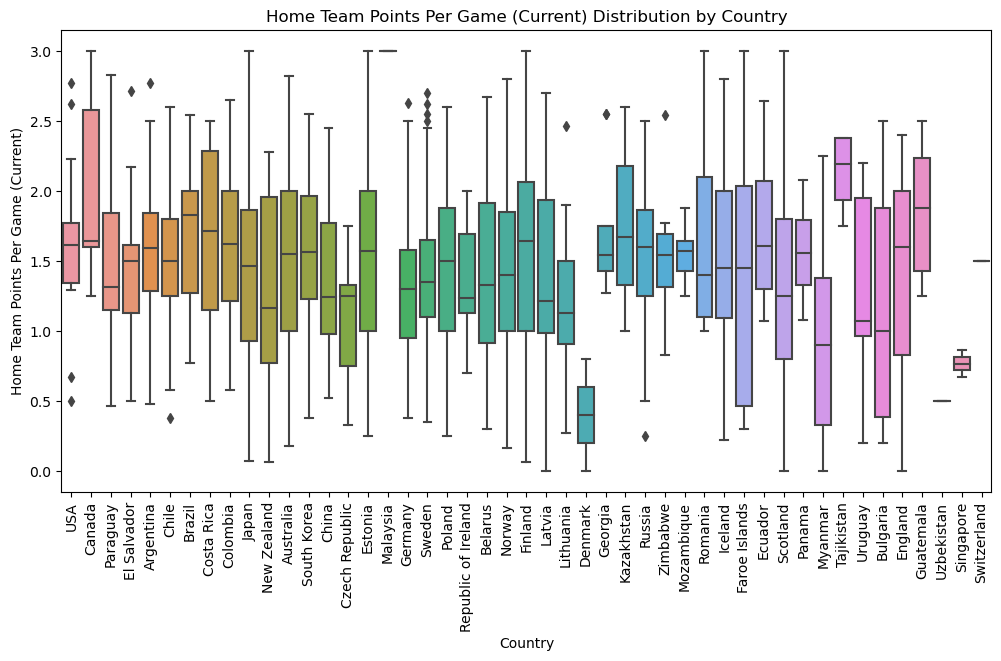

In [81]:
#box plot for continuous variable like home team points per game
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Home Team Points Per Game (Current)', data=df)
plt.xticks(rotation=90)
plt.title('Home Team Points Per Game (Current) Distribution by Country')
plt.show()


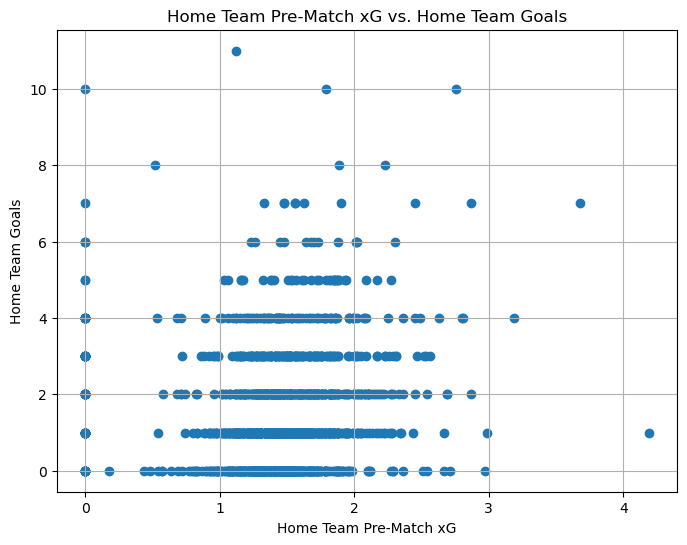

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Home Team Pre-Match xG'], df['Result - Home Team Goals'])
plt.title('Home Team Pre-Match xG vs. Home Team Goals')
plt.xlabel('Home Team Pre-Match xG')
plt.ylabel('Home Team Goals')
plt.grid(True)
plt.show()


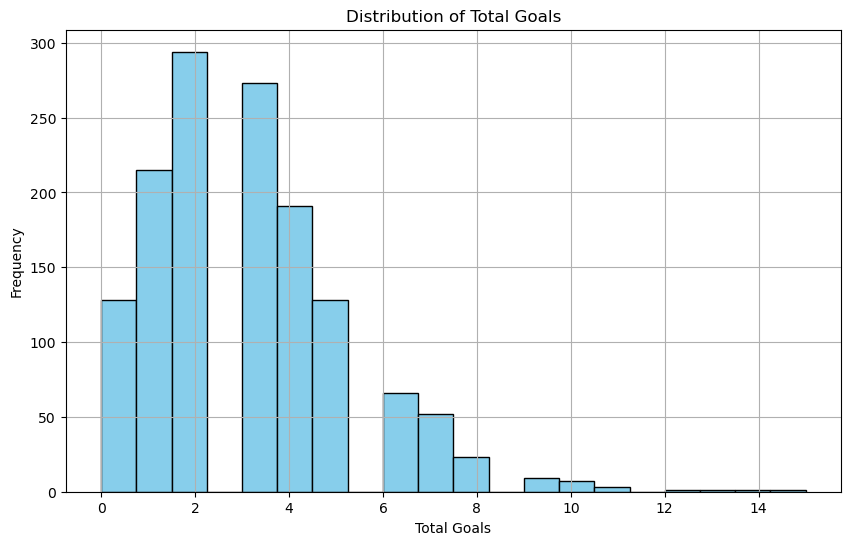

In [83]:
plt.figure(figsize=(10, 6))
plt.hist(df['Total Goals'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Goals')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Lets plot a correlation matrix to see how the different columns relate to each other, from there we'll be able to know which ones to drop and possible do some feature engineering.

/tmp/ipykernel_184112/3889472739.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='coolwarm', vmin=-1, vmax=1)


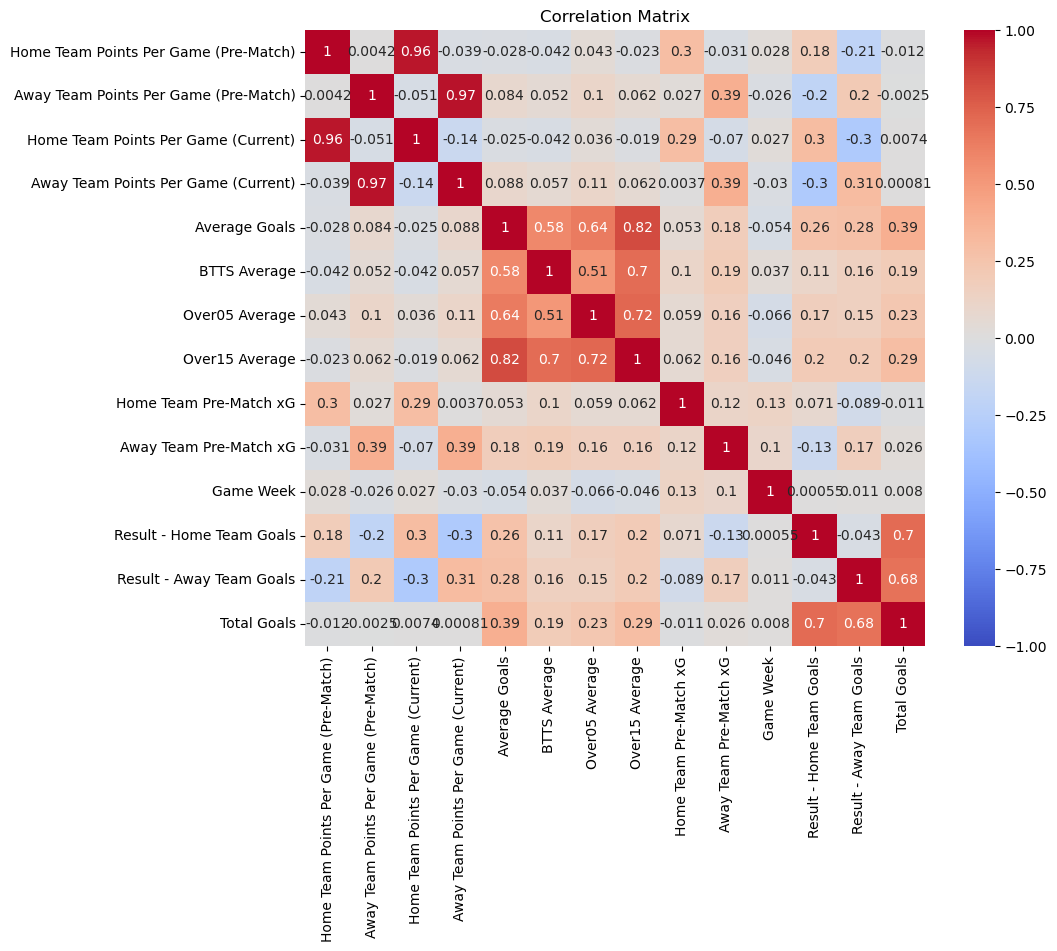

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
